In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [2]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
from simplemc.models.HolographicCosmology import HolographicCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.models.TsallisCosmology import TsallisCosmology
from simplemc.models.BarrowHDECosmology import BarrowHDECosmology

Initalizing nu density look up table... Done


In [3]:
c_ = Parameter("c", 1., 0.2, (0.6, 1.), "c")

om_ = Parameter("Om", 0.3038, 0.05, (0.1, 0.5), "\Omega_m") 

In [4]:
T = T = HolographicCosmology(varyc=True)

c_data = np.arange(0.9, 1.3, 0.1)
T.Om = 0.3

In [10]:
## Agregar prints para asegurarnos de estar graficando con los parámetros requeridos
print(f"Initial value of self.Om: {T.Om}")  
print(f"Hubble parameter: {T.h}") 

Initial value of self.Om: 0.3
Hubble parameter: 0.6821


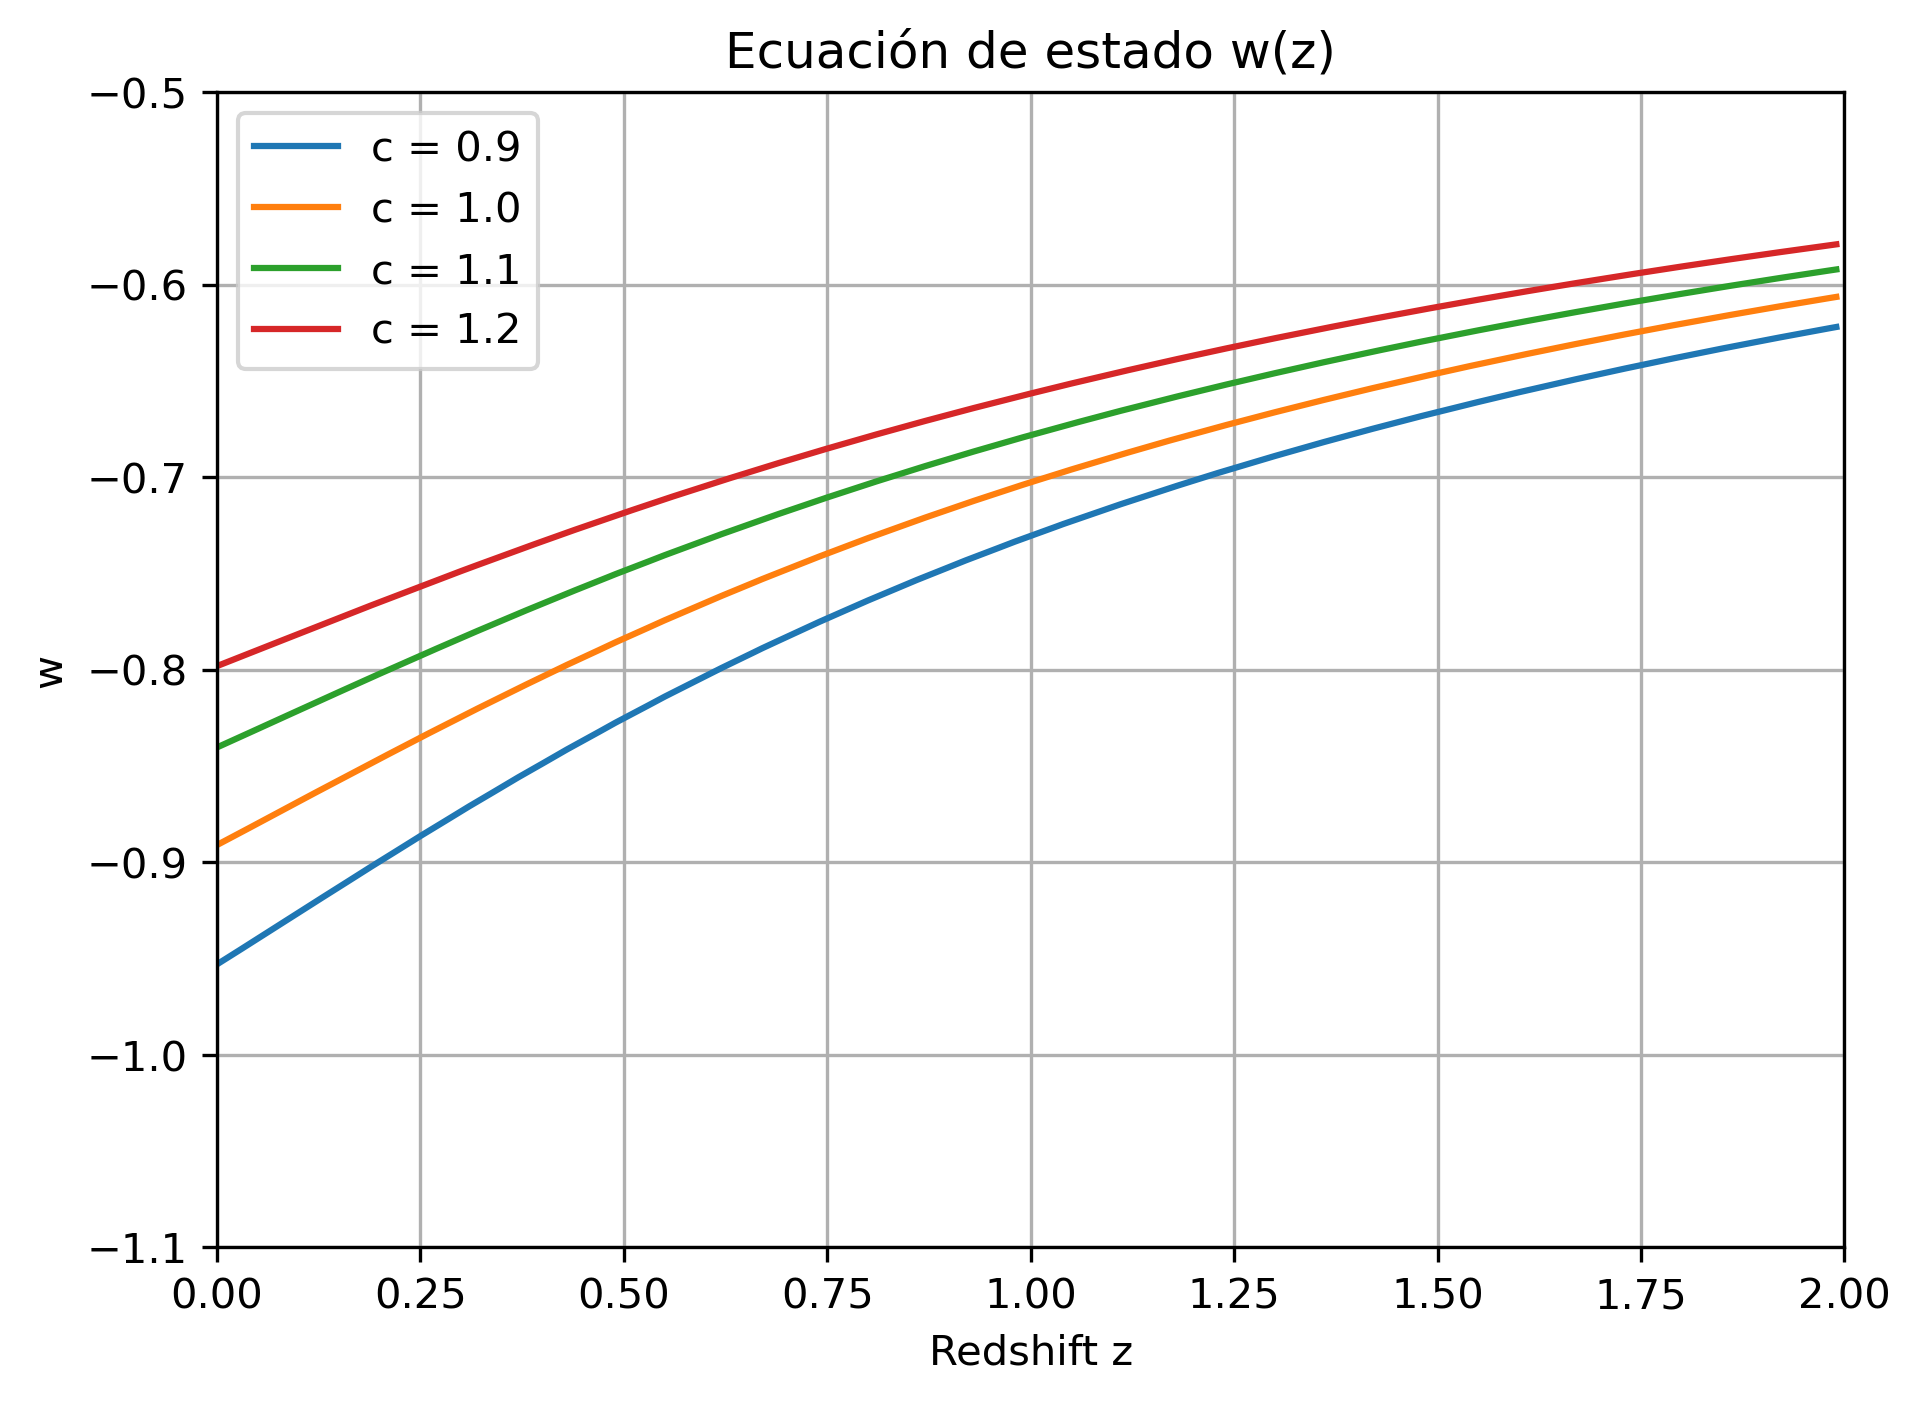

In [7]:
# Gráfica de w(z)
plt.figure(figsize=(7, 5), dpi=300)
zl = np.arange(0, 2., 0.01)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    plt.plot(zl, [T.EoS(z) for z in zl], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2)
plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("Ecuación de estado w(z)")
plt.grid()
plt.show()

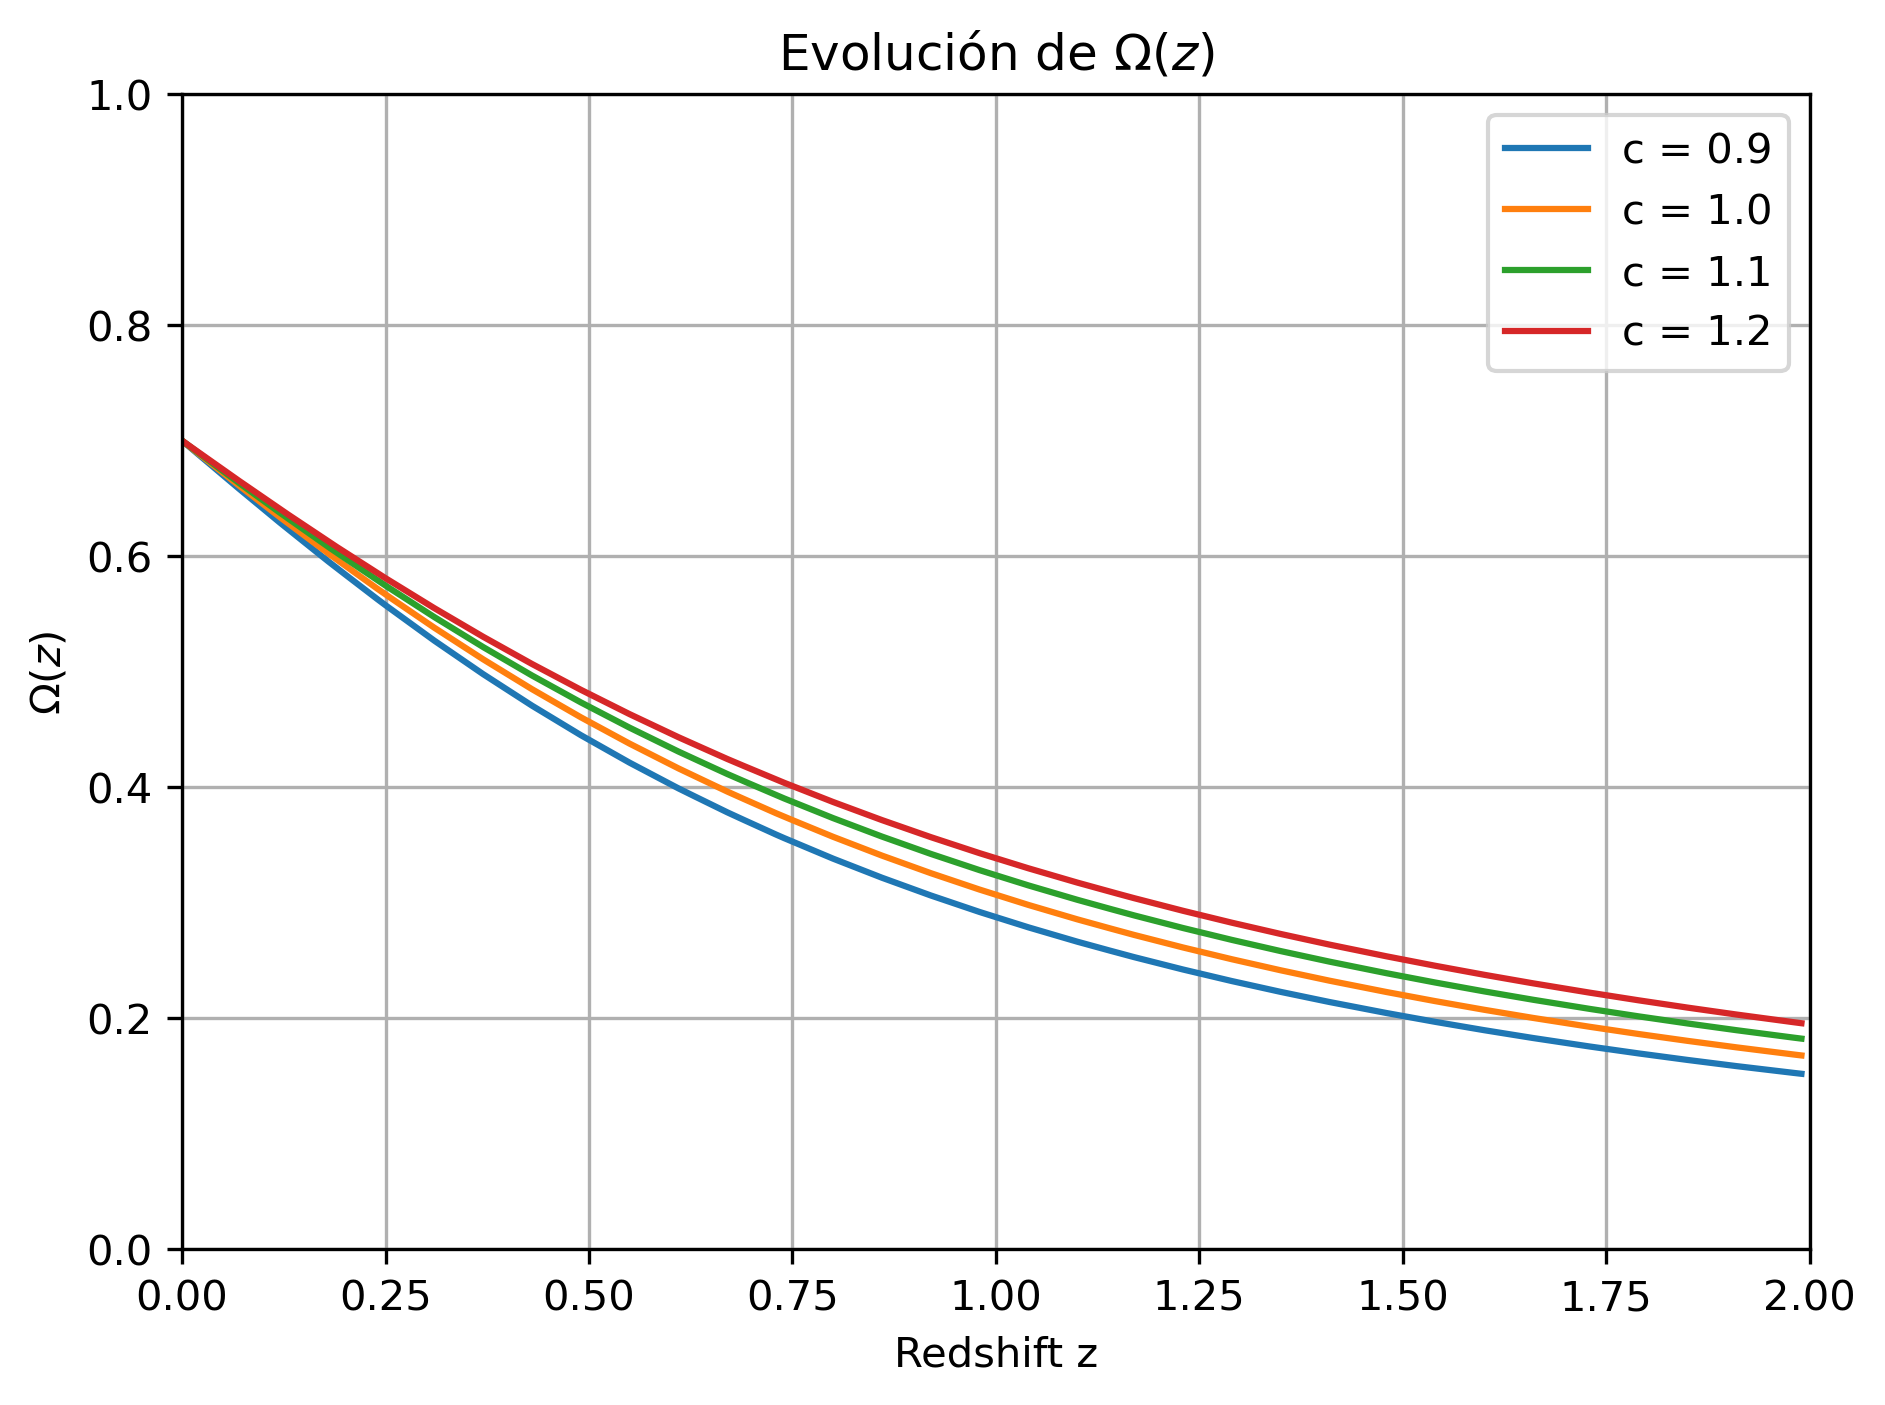

In [12]:
# Gráfica de \Omega(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    plt.plot(zl, [T.Ode(z) for z in zl], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Evolución de $\Omega(z)$")
plt.grid()
plt.show()

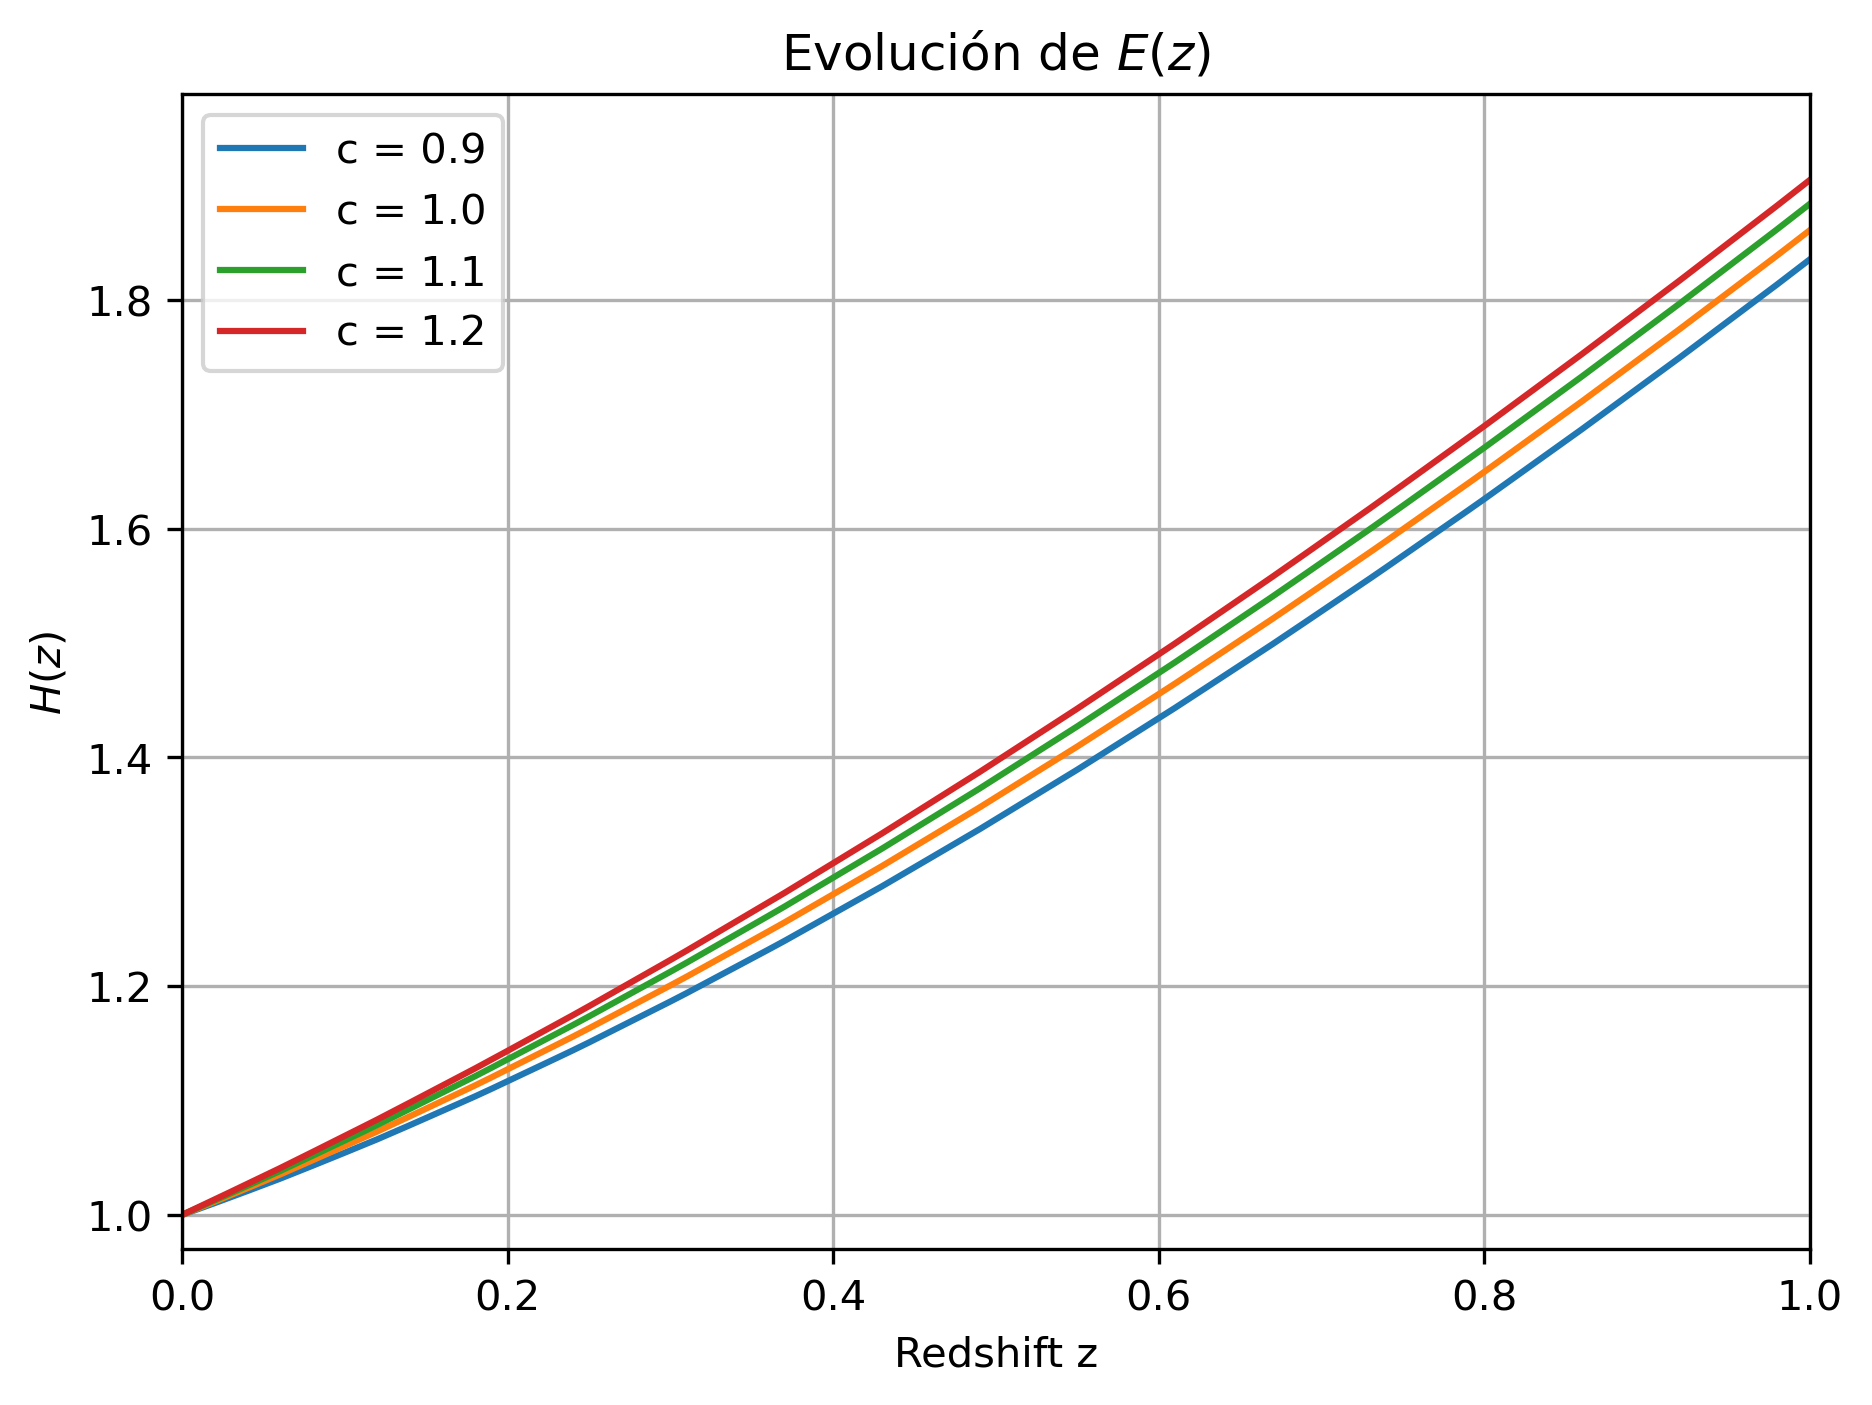

In [13]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    T.updateParams([c_])
    plt.plot(zl, np.sqrt(T.RHSquared_a(1./(1 + zl))), label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
plt.xlim(0, 1)
plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("Evolución de $E(z)$")
plt.grid()
plt.show()

/tmp/ipykernel_474960/2705395775.py:14: RuntimeWarning: divide by zero encountered in log
  xval = np.log(0,xini)


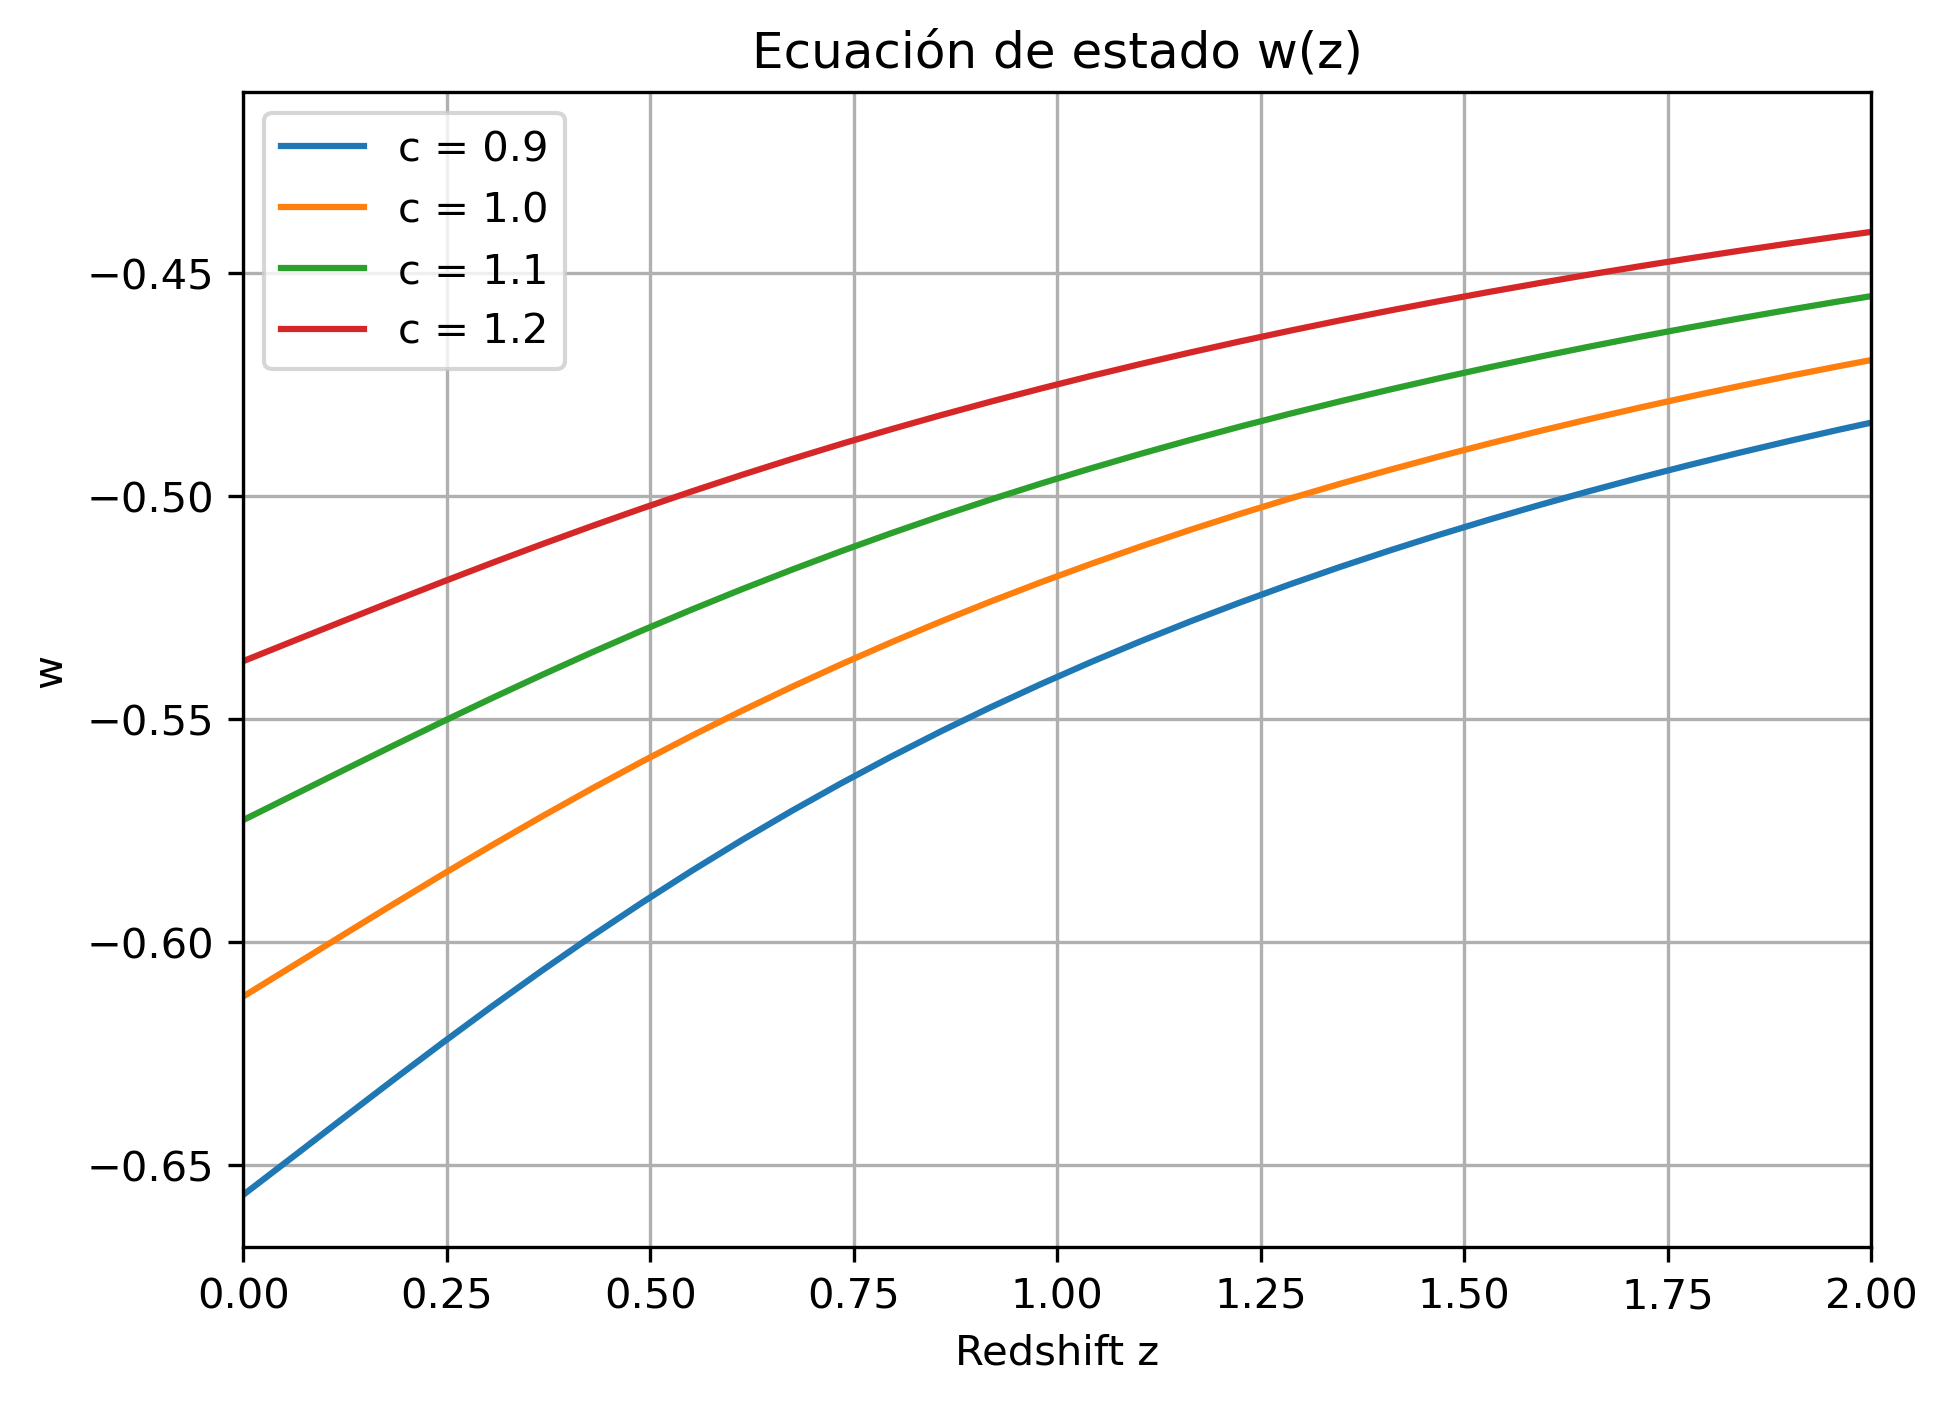

In [6]:
b_ = Parameter("b",0.5,0.1,  (0.0, 1.0), "s")
Bs = Bs = BarrowHDECosmology(varyb=True)

b_data = np.linspace(0.0,1.0,5)
Bs.Om = 0.3
Bs.b = 0.0
#  w(z) plot
zini = 3.0
xini = np.linspace(0,1./(1+zini))

zval = np.linspace(0,zini)
plt.figure(figsize=(7, 5), dpi=300)

xval = np.log(0,xini)
#eos = Bs.EoS(zval)


for val in c_data:
    c_.setValue(val)
    Bs.updateParams([c_])
    plt.plot(zval, [Bs.EoS(z) for z in zval], label=f"c = {val:.1f}")


#plt.plot(zval,eos)
plt.xlabel("Redshift z")
plt.ylabel("w")
plt.xlim(0, 2)
#plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("Ecuación de estado w(z)")
plt.grid()
plt.show()
    
 

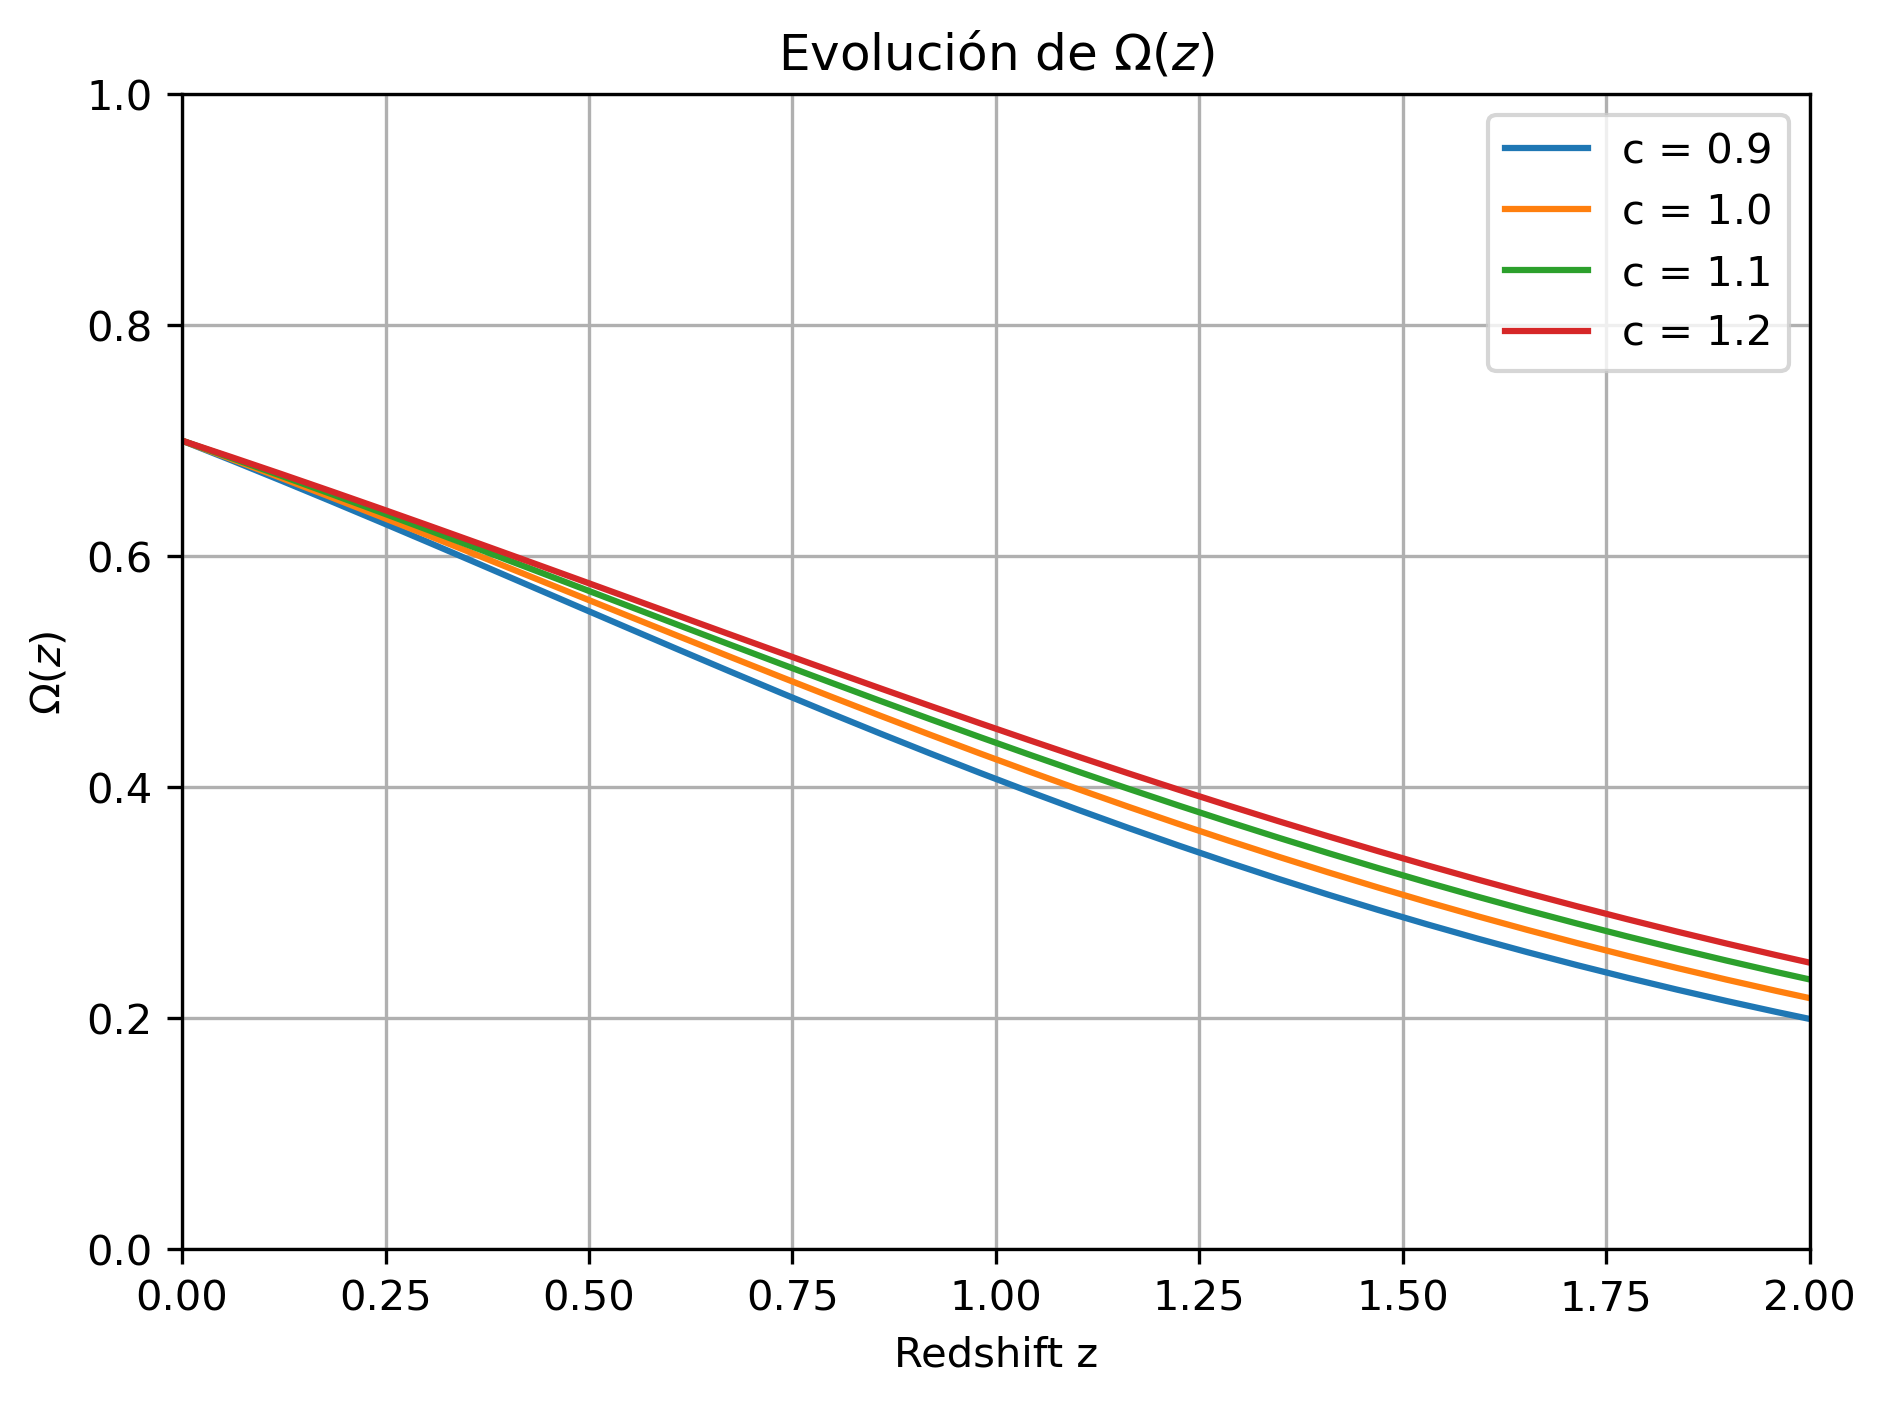

In [8]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in c_data:
    c_.setValue(val)
    Bs.updateParams([c_])
    plt.plot(zval, [Bs.Ode(x) for x in xval], label=f"c = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"Evolución de $\Omega(z)$")
plt.grid()
plt.show()

In [10]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]



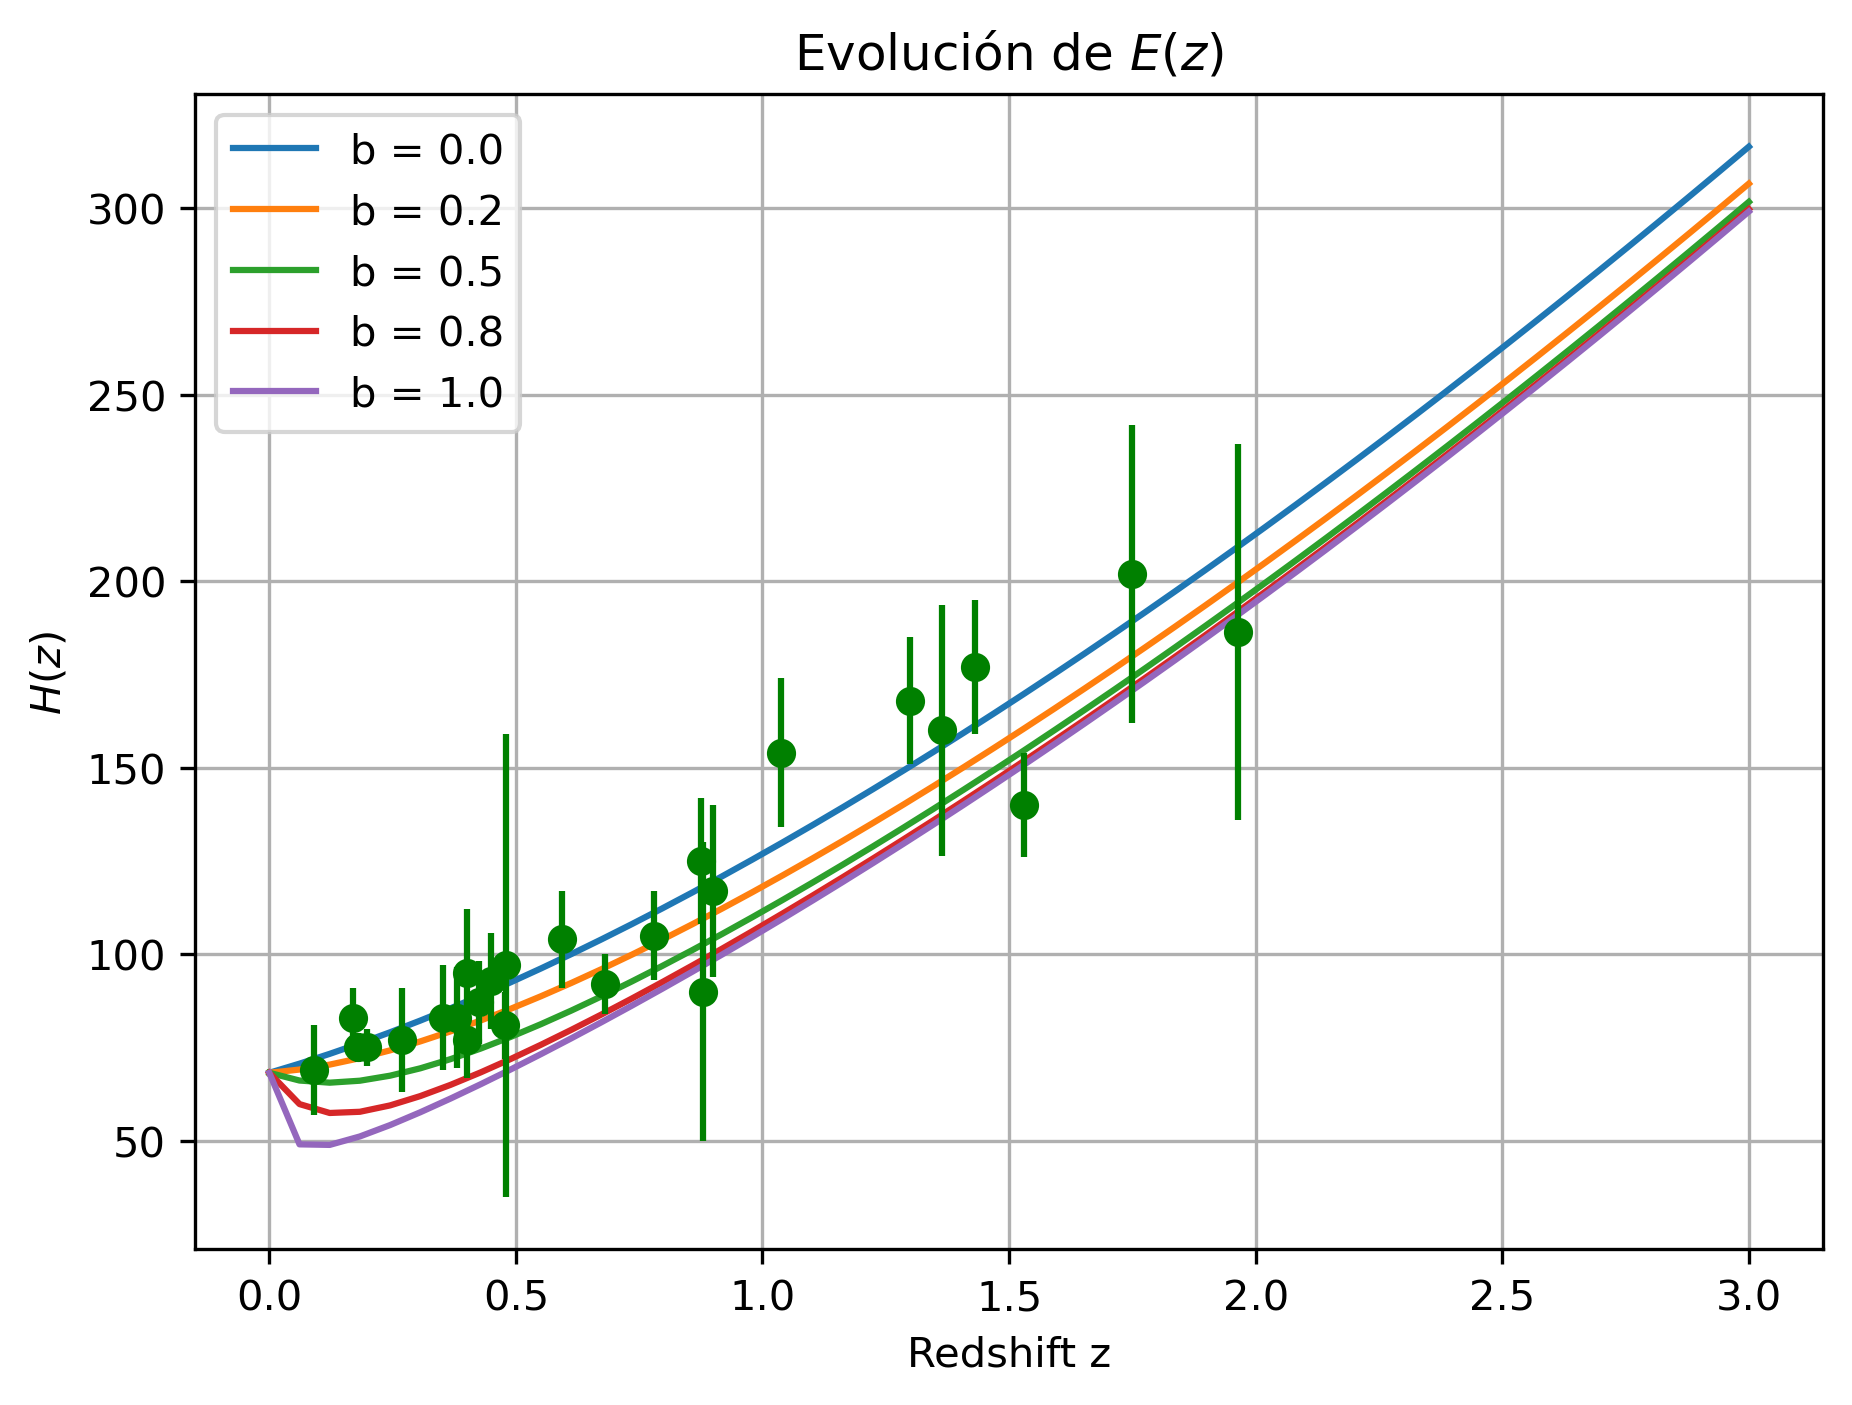

In [12]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in b_data:
    b_.setValue(val)
    Bs.updateParams([b_])
    plt.plot(zval, Bs.h*100*np.sqrt(Bs.RHSquared_a(1./(1 + zval))), label=f"b = {val:.1f}")

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
#plt.xlim(0, 1)
#plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("Evolución de $E(z)$")
plt.grid()
plt.show()

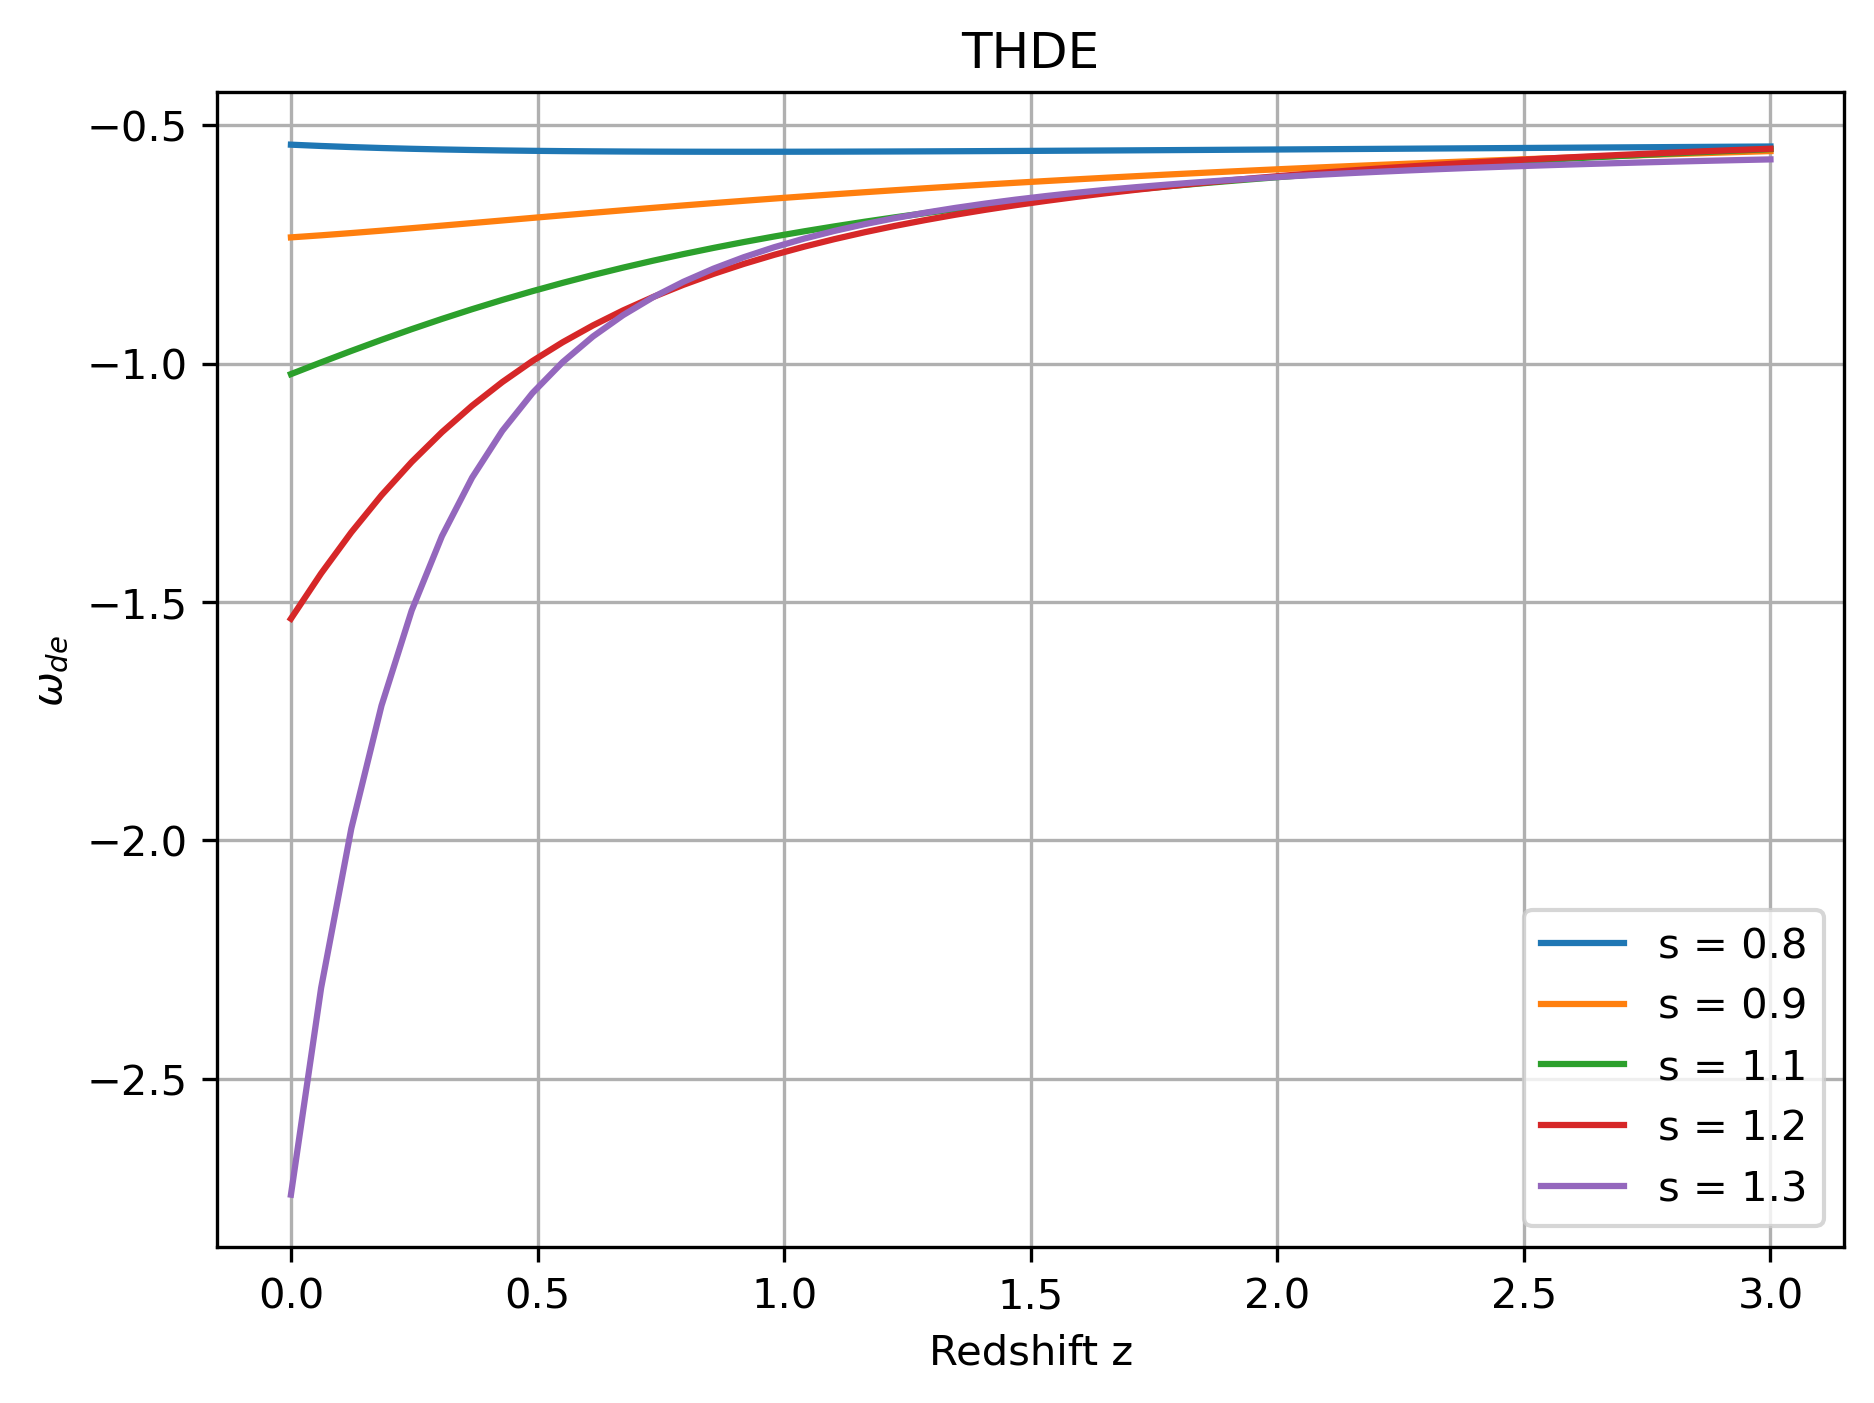

In [6]:
s_ = Parameter("s",1.5,0.1,  (1.0, 2.0), "s")
Ts = Ts = TsallisCosmology(varys=True)


s_data = np.linspace(0.8,1.3,5)
Ts.Om = 0.3
Ts.c = 1.0
#  w(z) plot

plt.figure(figsize=(7, 5), dpi=300)

for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, [Ts.EoS(z) for z in zval], label=f"s = {val:.1f}")


#plt.plot(zval,eos)
plt.xlabel("Redshift z")
plt.ylabel("$\omega_{de}$")
#plt.xlim(0, 2)
#plt.ylim(-1.1, -0.5)
plt.legend()
plt.title("THDE")
plt.grid()
plt.show()
    
 

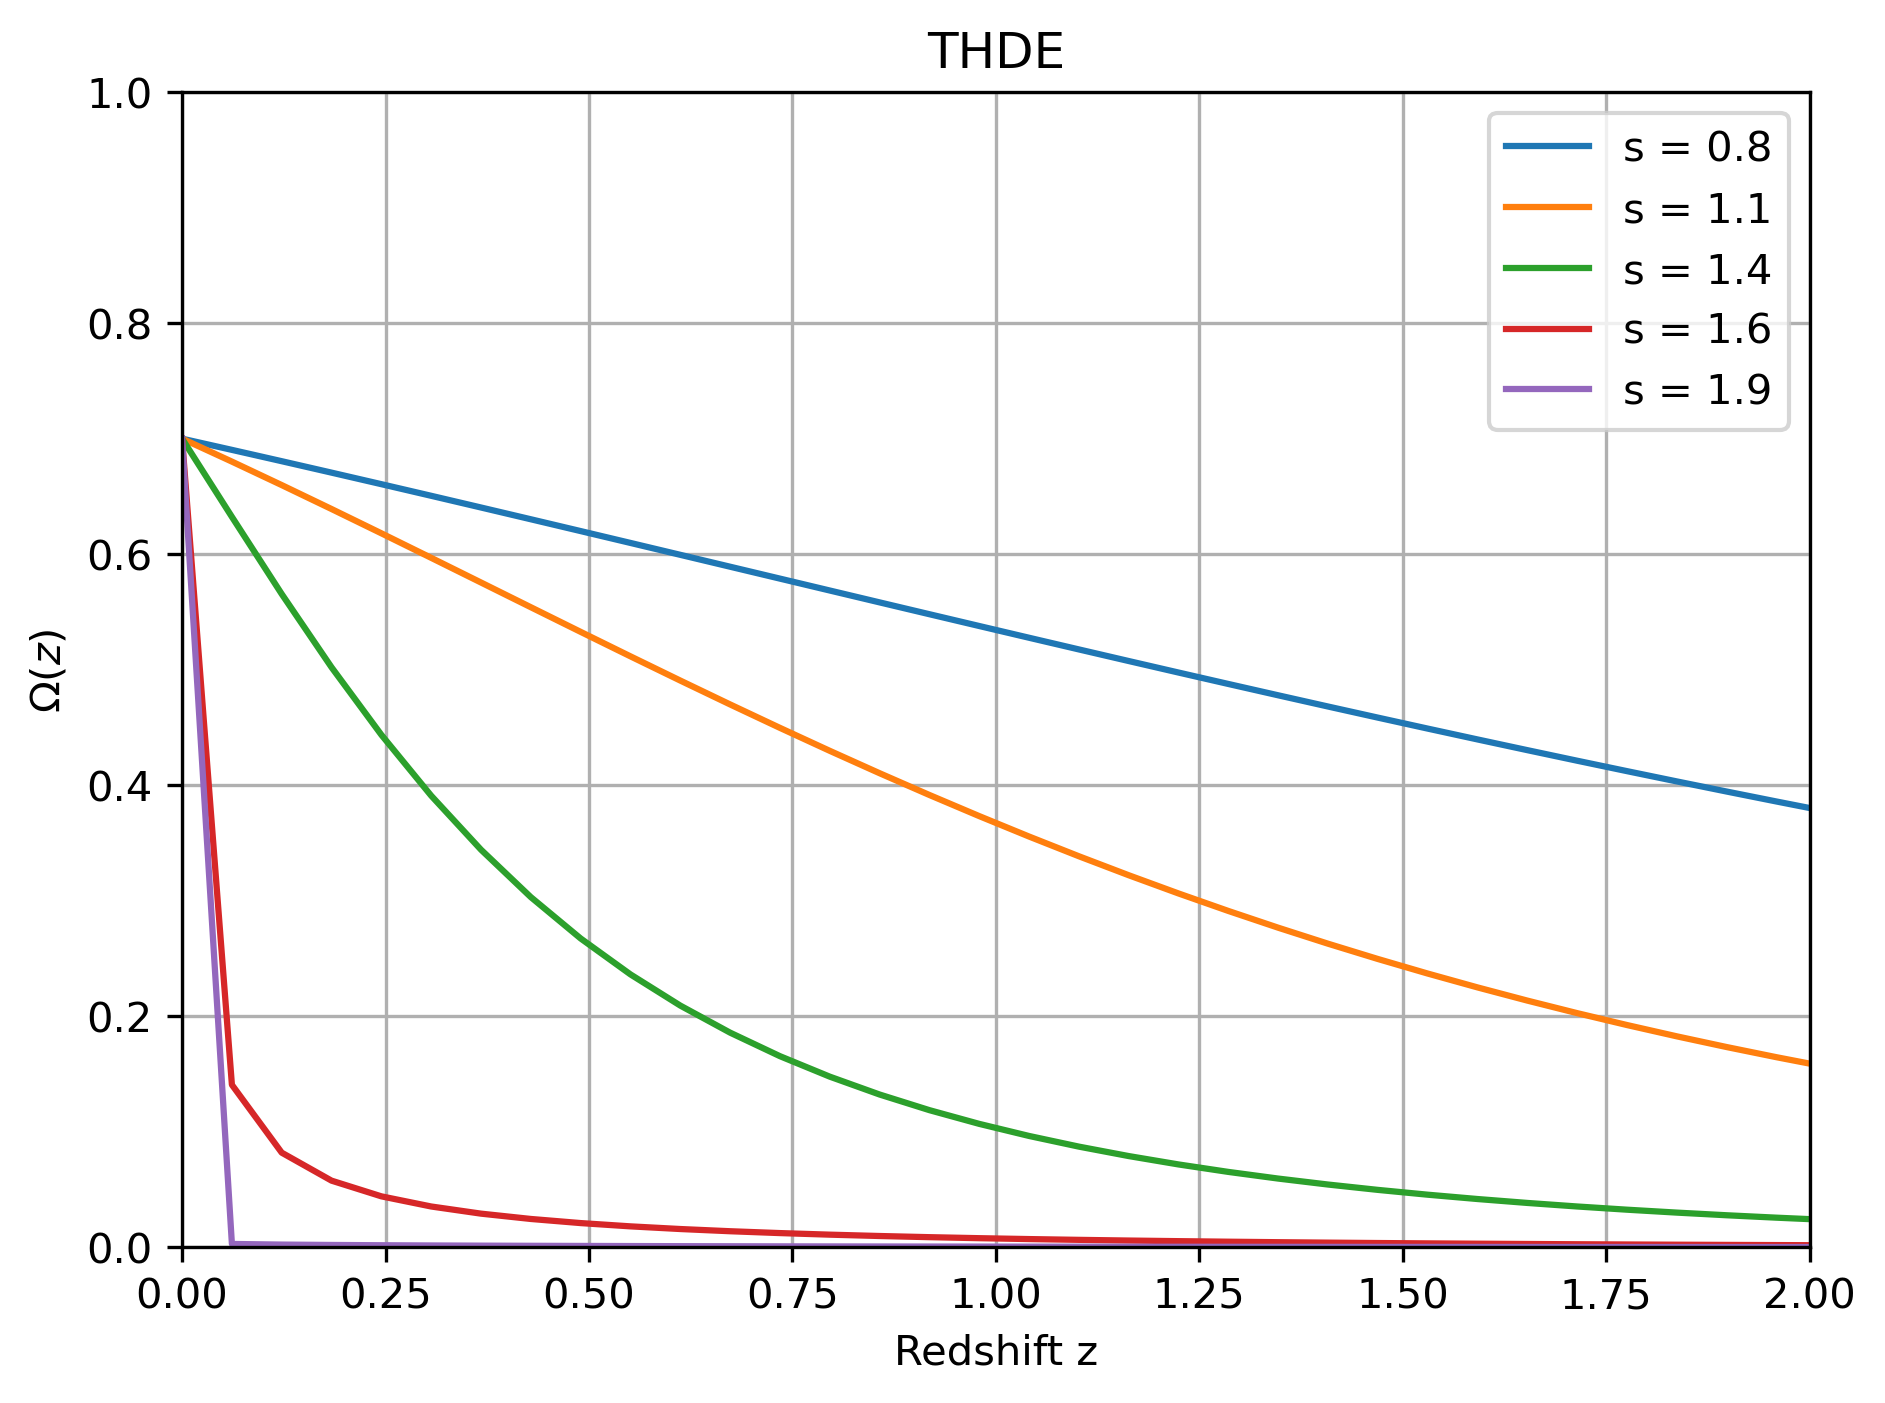

In [13]:
# Gráfica de \Omega(z)
xini = np.log(1./(1+3))
xval = np.linspace(0,xini)

plt.figure(figsize=(7, 5), dpi=300)
for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, [Ts.Ode(x) for x in xval], label=f"s = {val:.1f}")
plt.xlabel("Redshift z")
plt.ylabel(r"$\Omega(z)$")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.title(r"THDE")
plt.grid()
plt.show()

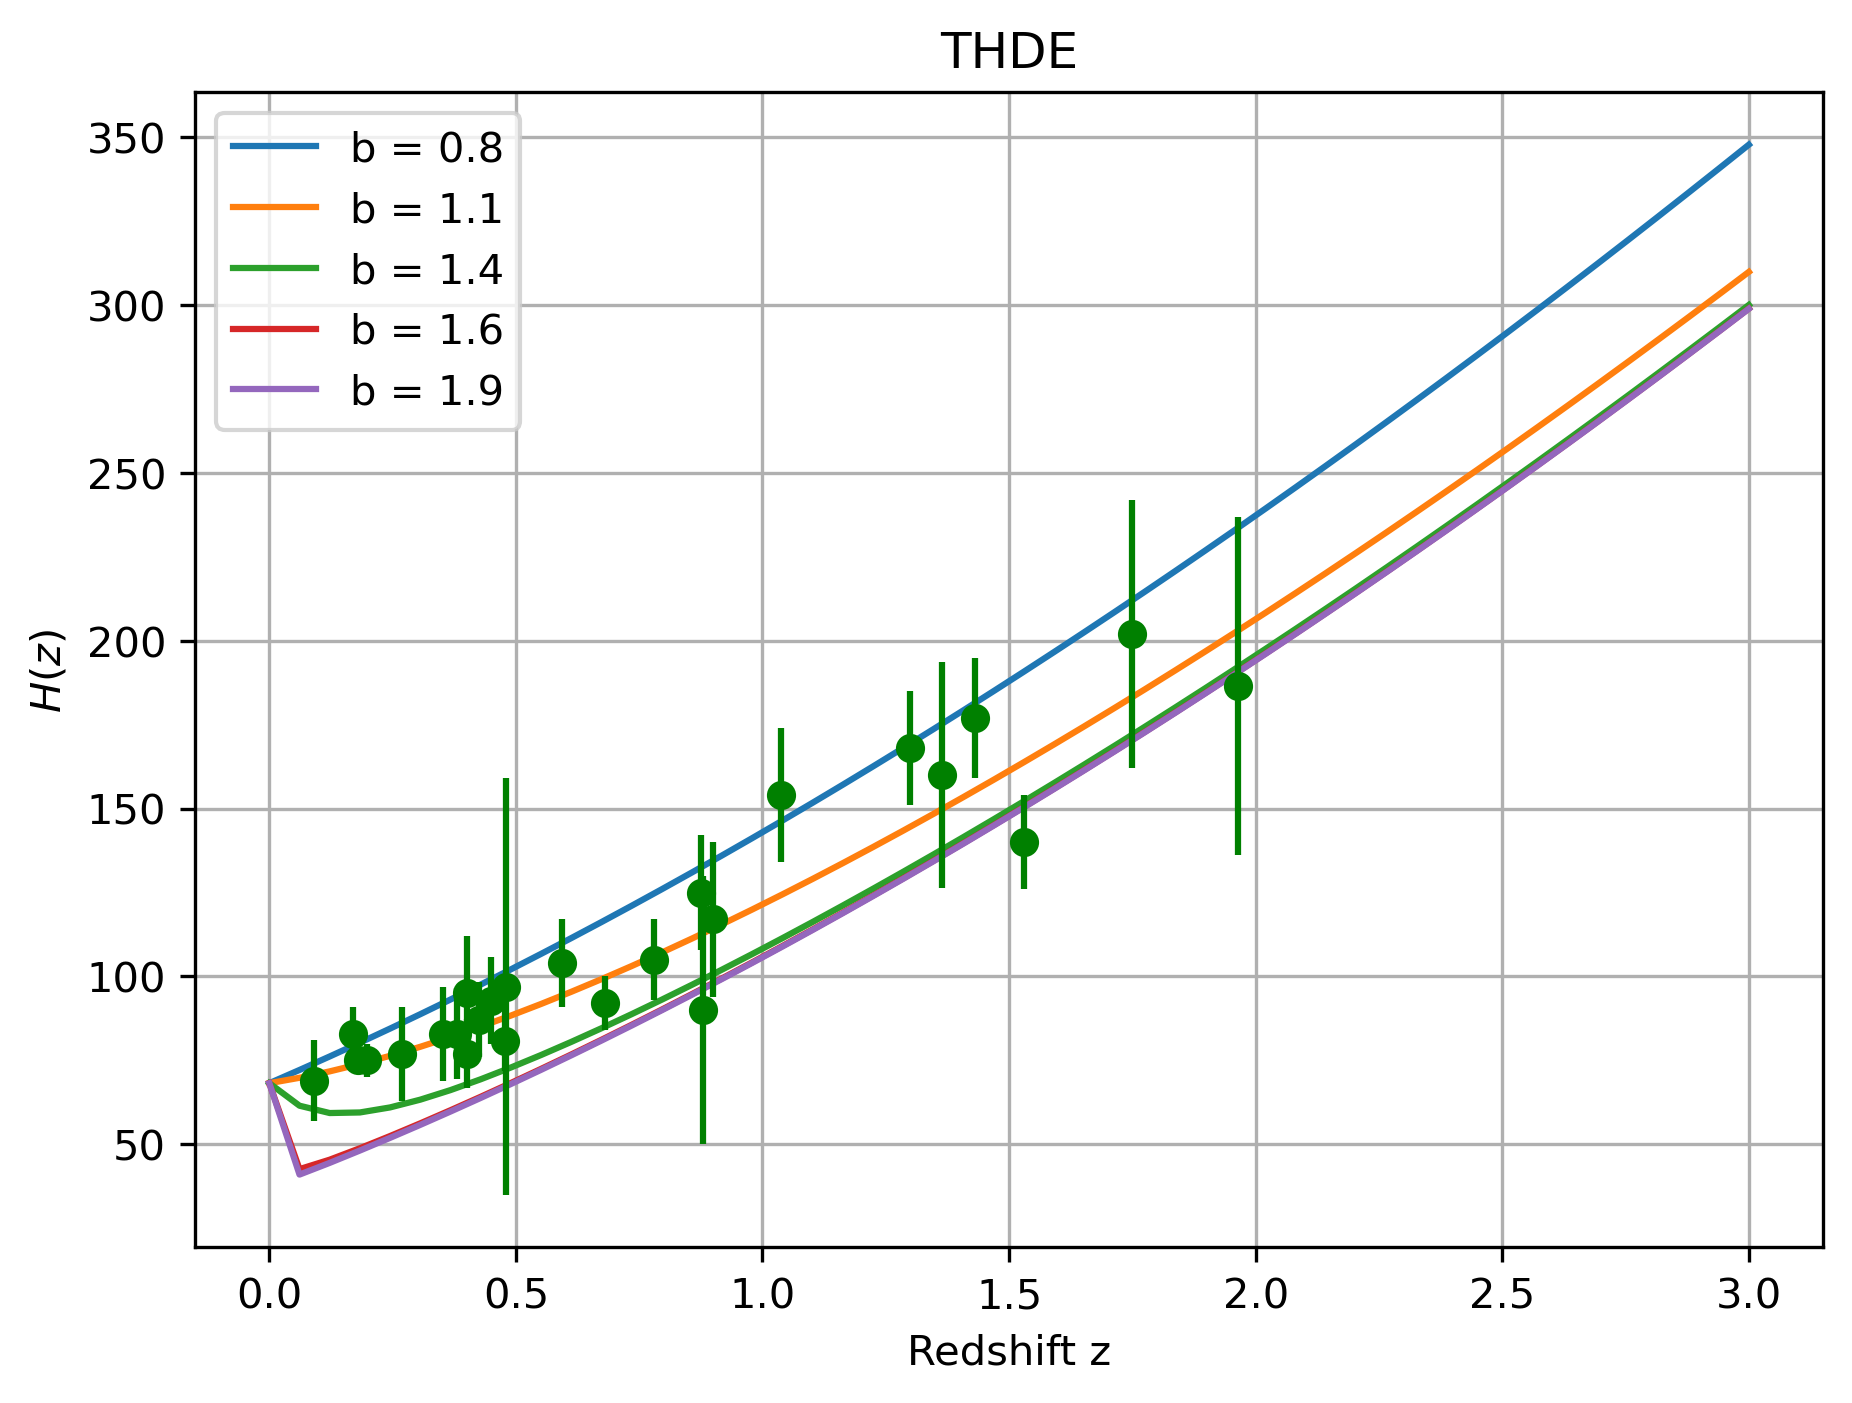

In [16]:
# Gráfica de H(z)
plt.figure(figsize=(7, 5), dpi=300)
for val in s_data:
    s_.setValue(val)
    Ts.updateParams([s_])
    plt.plot(zval, Ts.h*100*np.sqrt(Ts.RHSquared_a(1./(1 + zval))), label=f"b = {val:.1f}")

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.xlabel("Redshift z")
plt.ylabel(r"$H(z)$")
#plt.xlim(0, 1)
#plt.ylim(0.97,1.98)  # Ajustar según sea necesario
plt.legend()
plt.title("THDE")
plt.grid()
plt.show()